https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# Data

In [2]:
data = pd.read_csv('E:/Kaggle-Data/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region = pd.read_csv('E:/Kaggle-Data/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')

In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
data = pd.merge(data, region, on='NOC', how='left')

In [7]:
data.shape

(271116, 17)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(269731, 17)

In [10]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# Auxiliary Functions

In [11]:
def insight(x):
    print('Min:', x.min())
    print('Median:', x.median())
    print('Max:', x.max())

In [12]:
def elaborate(row):
    print(f"{row['Name']} ({row['Age']} {row['Sex']}) from {row['City']}, {row['region']} won {row['Medal']} for {row['Sport']} during {row['Games']} in {row['City']}")

# Narration

**PARTICIPATION OVER THE YEARS**

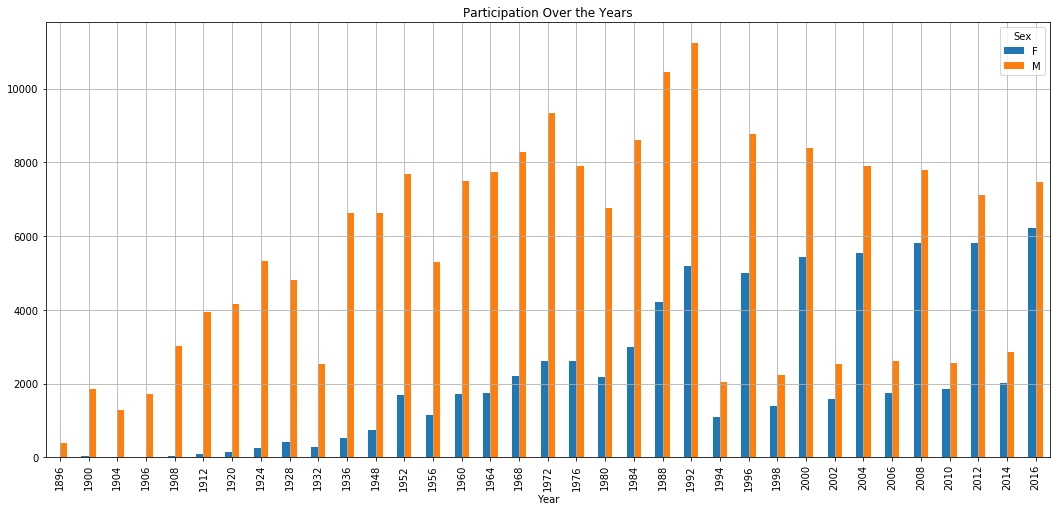

In [13]:
data.pivot_table(index='Year', columns='Sex', values='Name', aggfunc='count').plot.bar(figsize=(18,8),
                                                                            grid=True, title='Participation Over the Years')

**MOST PARTICIPATED SPORTS**

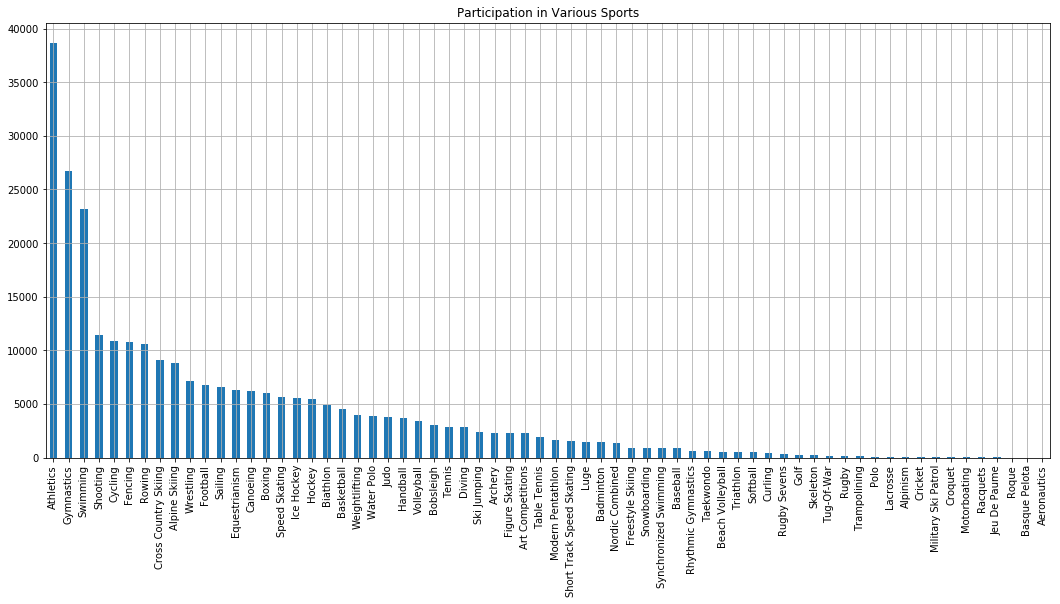

In [14]:
data['Sport'].value_counts().plot.bar(figsize=(18,8), grid=True, title='Participation in Various Sports')

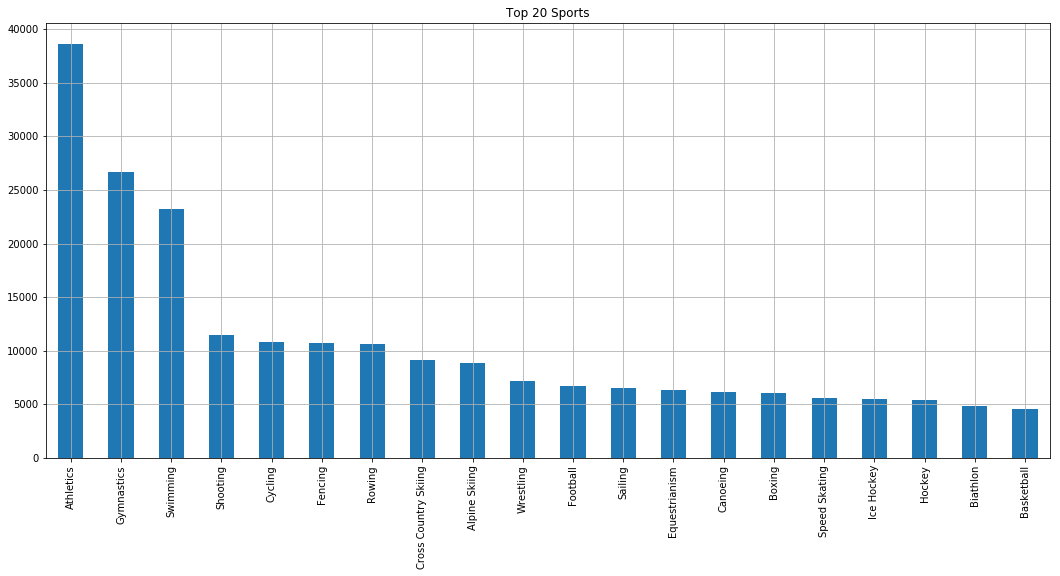

In [15]:
data['Sport'].value_counts()[:20].plot.bar(figsize=(18,8), grid=True, title='Top 20 Sports')

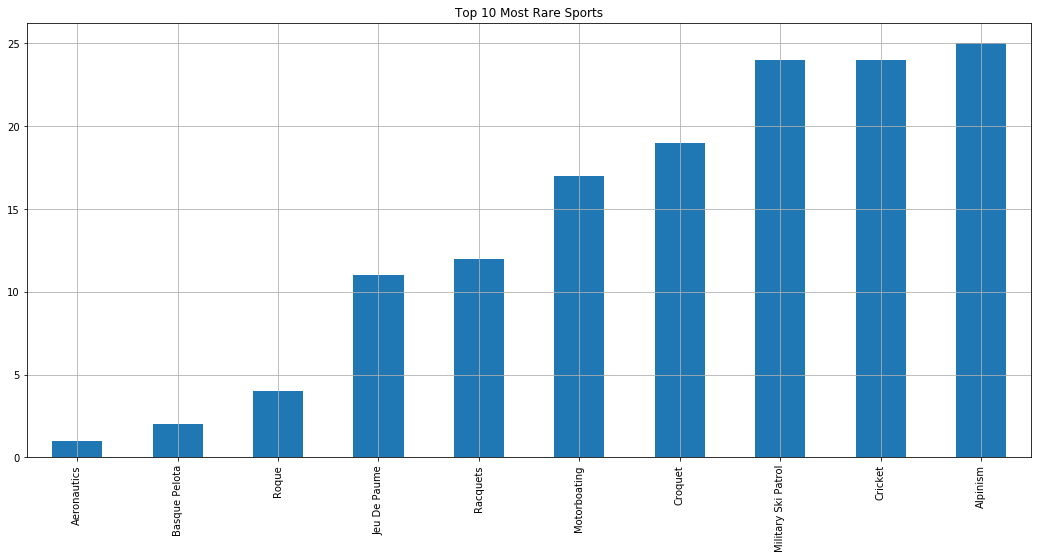

In [16]:
data['Sport'].value_counts()[::-1].head(10).plot.bar(figsize=(18,8), grid=True, title='Top 10 Most Rare Sports')

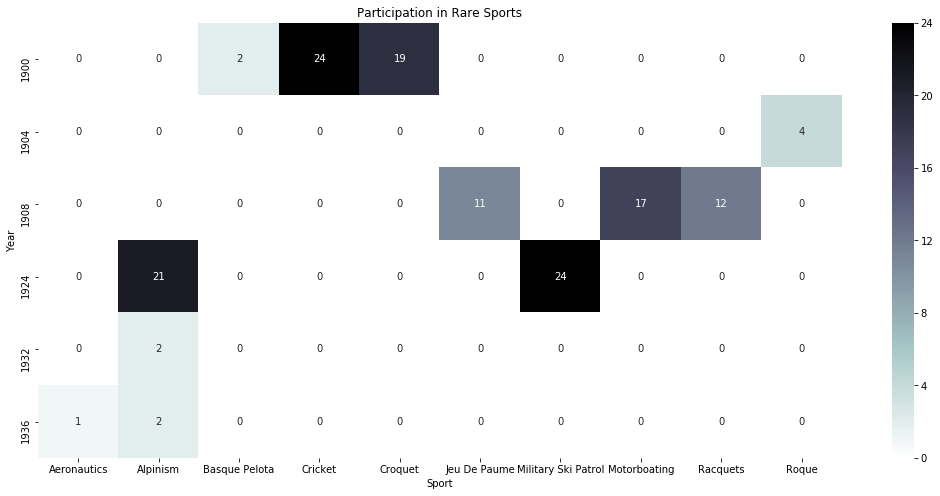

In [17]:
fig, ax = plt.subplots(figsize=(18,8))
ax.set_title('Participation in Rare Sports')
sns.heatmap(data[data['Sport'].isin(['Aeronautics', 'Basque Pelota', 'Roque', 'Jeu De Paume', 'Racquets',
       'Motorboating', 'Croquet', 'Cricket', 'Military Ski Patrol',
       'Alpinism'])].pivot_table(index='Year', columns='Sport', aggfunc='count', values='Name').fillna(0),
            ax=ax, cmap='bone_r', annot=True)

In [18]:
for sport in ['Aeronautics', 'Basque Pelota', 'Roque', 'Jeu De Paume', 'Racquets',
       'Motorboating', 'Croquet', 'Cricket', 'Military Ski Patrol',
       'Alpinism']:
    print(f'Winners for {sport}:')
    try:
        elaborate(data[(data['Sport'] == sport) & (data['Medal'] == 'Gold')].iloc[0])
        elaborate(data[(data['Sport'] == sport) & (data['Medal'] == 'Silver')].iloc[0])
        elaborate(data[(data['Sport'] == sport) & (data['Medal'] == 'Bronze')].iloc[0])
    except:
        pass
    print()

Winners for Aeronautics:
Hermann Schreiber (26.0 M) from Berlin, Switzerland won Gold for Aeronautics during 1936 Summer in Berlin

Winners for Basque Pelota:
Jos de Amzola y Aspiza (26.0 M) from Paris, Spain won Gold for Basque Pelota during 1900 Summer in Paris

Winners for Roque:
Charles Jacobus (64.0 M) from St. Louis, USA won Gold for Roque during 1904 Summer in St. Louis
Smith O. Streeter (59.0 M) from St. Louis, USA won Silver for Roque during 1904 Summer in St. Louis
Charles Brown (37.0 M) from St. Louis, USA won Bronze for Roque during 1904 Summer in St. Louis

Winners for Jeu De Paume:
Jay Gould, II (19.0 M) from London, USA won Gold for Jeu De Paume during 1908 Summer in London
Eustace Hamilton Miles (39.0 M) from London, UK won Silver for Jeu De Paume during 1908 Summer in London
Neville Stephen Bulwer-Lytton (29.0 M) from London, UK won Bronze for Jeu De Paume during 1908 Summer in London

Winners for Racquets:
John Jacob Astor (21.0 M) from London, UK won Gold for Racquet

**AGE OF ATHELETES**

In [19]:
print('Age of Athletes')
insight(data['Age'])

Age of Athletes
Min: 10.0
Median: 24.0
Max: 97.0


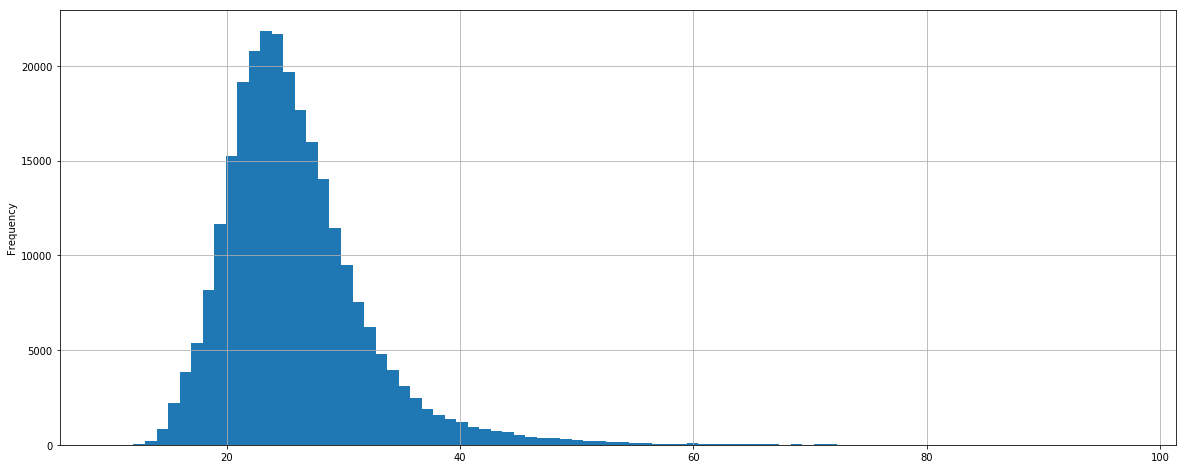

In [20]:
data['Age'].plot.hist(bins=88, figsize=(20,8), grid=True)

In [21]:
print('Eldest Athlete')
elaborate(data.sort_values('Age', ascending=False).iloc[0])

Eldest Athlete
John Quincy Adams Ward (97.0 M) from Amsterdam, USA won nan for Art Competitions during 1928 Summer in Amsterdam


In [22]:
print('Eldest Female Athlete')
elaborate(data[data['Sex'] == 'F'].sort_values('Age', ascending=False).iloc[0])

Eldest Female Athlete
Ernestine Lonie Ernesta Robert-Mrignac (74.0 F) from Paris, France won nan for Art Competitions during 1924 Summer in Paris


**AGE OF MEDALISTS**

In [23]:
print('Age of Medalists')
insight(data[data['Medal'].notna()]['Age'])

Age of Medalists
Min: 10.0
Median: 25.0
Max: 73.0


In [24]:
print('Age of Bronze Medalists')
insight(data[data['Medal'] == 'Bronze']['Age'])

Age of Bronze Medalists
Min: 10.0
Median: 25.0
Max: 72.0


In [25]:
print('Age of Silver Medalists')
insight(data[data['Medal'] == 'Silver']['Age'])

Age of Silver Medalists
Min: 11.0
Median: 25.0
Max: 73.0


In [26]:
print('Age of Gold Medalists')
insight(data[data['Medal'] == 'Gold']['Age'])

Age of Gold Medalists
Min: 13.0
Median: 25.0
Max: 64.0


D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


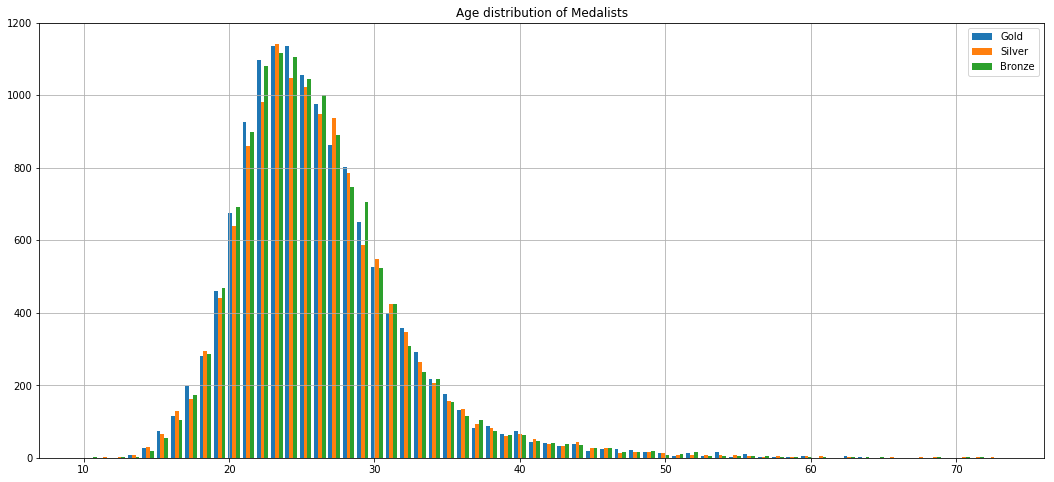

In [27]:
fig, ax = plt.subplots(figsize=(18,8))
plt.hist([data[data['Medal'] == 'Gold']['Age'], 
          data[data['Medal'] == 'Silver']['Age'], 
          data[data['Medal'] == 'Bronze']['Age']],
         bins=64, label=['Gold', 'Silver', 'Bronze'])
plt.title('Age distribution of Medalists')
plt.grid()
plt.legend()
plt.show()

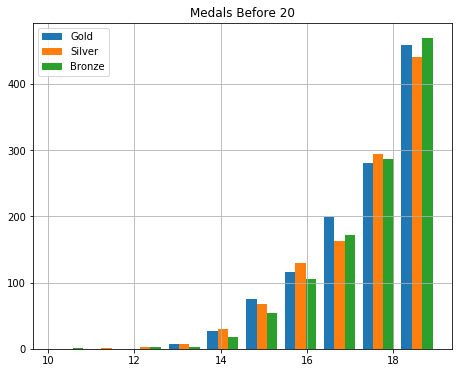

In [28]:
fig, ax = plt.subplots(figsize=(7.5,6))
plt.hist([data[(data['Medal'] == 'Gold') & (data['Age'] <= 19)]['Age'], 
          data[(data['Medal'] == 'Silver') & (data['Age'] <= 19)]['Age'], 
          data[(data['Medal'] == 'Bronze') & (data['Age'] <= 19)]['Age']],
         bins=10, label=['Gold', 'Silver', 'Bronze'])
plt.title('Medals Before 20')
plt.grid()
plt.legend()
plt.show()

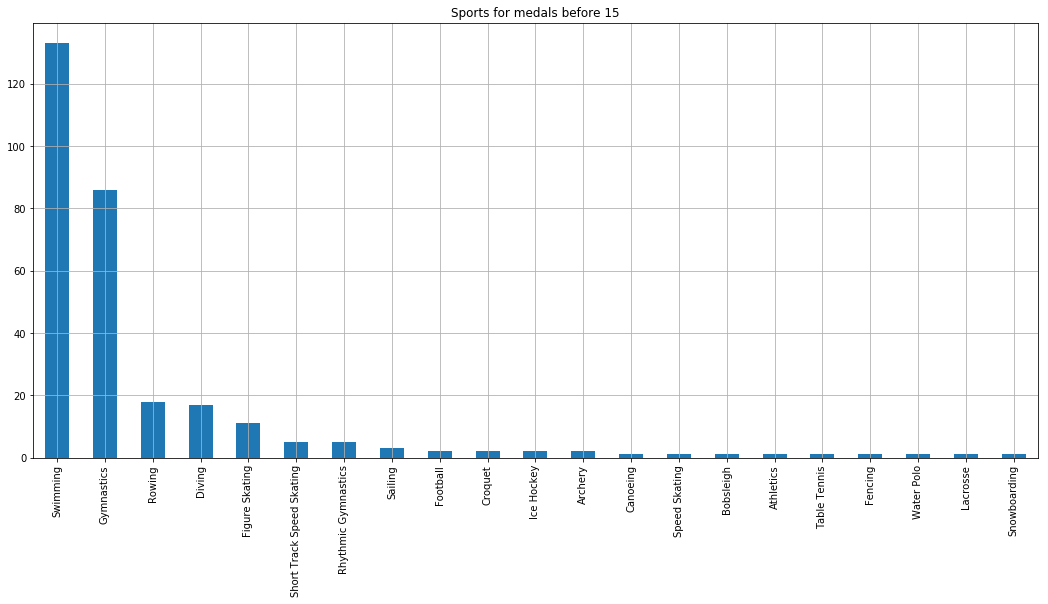

In [29]:
data[(data['Medal'].notna()) & (data['Age'] <= 15)]['Sport'].value_counts().plot.bar(figsize=(18,8), grid=True, 
                                                                                    title='Sports for medals before 15')

In [30]:
young_achievers = data[(data['Medal'].notna()) & 
                       (data['Age'] <= 13)].sort_values('Year').sort_values('Age').reset_index(drop=True)

In [31]:
young_achievers

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN
1,40129,Luigina Giavotti,F,11.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
2,125092,tienne Nol Henri Vandernotte,M,12.0,NaN,37.0,France,FRA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Fours,Bronze,France,NaN
3,113580,Inge Srensen (-Tabur),F,12.0,NaN,NaN,Denmark,DEN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 200 metres Breaststroke,Bronze,Denmark,NaN
4,125944,Ines Vercesi,F,12.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
5,125092,tienne Nol Henri Vandernotte,M,12.0,NaN,37.0,France,FRA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Pairs,Bronze,France,NaN
6,96664,Dorothy Poynton-Hill (-Teuber),F,12.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Diving,Diving Women's Springboard,Silver,USA,NaN
7,74712,Carla Marangoni,F,12.0,NaN,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
8,37398,Fu Mingxia,F,13.0,160.0,48.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Diving,Diving Women's Platform,Gold,China,NaN
9,41040,Gina Elena Gogean (-Groza),F,13.0,150.0,40.0,Romania,ROU,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Silver,Romania,NaN


In [32]:
print('Youngest Bronze Medalist and Yougest Medalist:')
elaborate(young_achievers.iloc[0])
print('Youngest Female Bronze Medalist:')
elaborate(young_achievers.iloc[4])

Youngest Bronze Medalist and Yougest Medalist:
Dimitrios Loundras (10.0 M) from Athina, Greece won Bronze for Gymnastics during 1896 Summer in Athina
Youngest Female Bronze Medalist:
Ines Vercesi (12.0 F) from Amsterdam, Italy won Silver for Gymnastics during 1928 Summer in Amsterdam


In [33]:
print('Yougest Silver Medalist:')
elaborate(young_achievers.iloc[1])
print('Yougest Male Silver Medalist:')
elaborate(young_achievers.iloc[16])

Yougest Silver Medalist:
Luigina Giavotti (11.0 F) from Amsterdam, Italy won Silver for Gymnastics during 1928 Summer in Amsterdam
Yougest Male Silver Medalist:
Nils Skoglund (13.0 M) from Antwerpen, Sweden won Silver for Diving during 1920 Summer in Antwerpen


In [34]:
print('Yougest Gold Medalist:')
elaborate(young_achievers.iloc[8])
print('Yougest Male Gold Medalist:')
elaborate(young_achievers.iloc[14])

Yougest Gold Medalist:
Fu Mingxia (13.0 F) from Barcelona, China won Gold for Diving during 1992 Summer in Barcelona
Yougest Male Gold Medalist:
Klaus Zerta (13.0 M) from Roma, Germany won Gold for Rowing during 1960 Summer in Roma


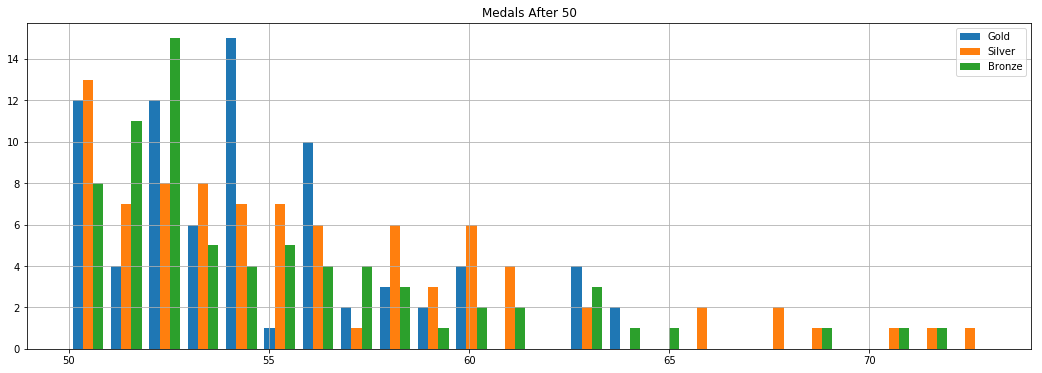

In [35]:
fig, ax = plt.subplots(figsize=(18,6))
plt.hist([data[(data['Medal'] == 'Gold') & (data['Age'] >= 50)]['Age'], 
          data[(data['Medal'] == 'Silver') & (data['Age'] >= 50)]['Age'], 
          data[(data['Medal'] == 'Bronze') & (data['Age'] >= 50)]['Age']],
         bins=24, label=['Gold', 'Silver', 'Bronze'])
plt.title('Medals After 50')
plt.grid()
plt.legend()
plt.show()

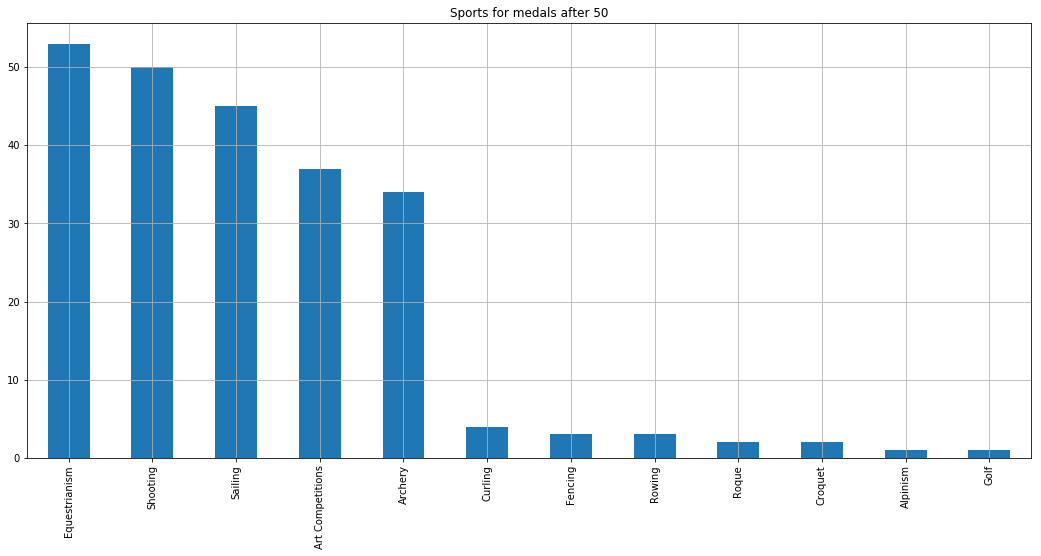

In [36]:
data[(data['Medal'].notna()) & (data['Age'] >= 50)]['Sport'].value_counts().plot.bar(figsize=(18,8), grid=True, 
                                                                                    title='Sports for medals after 50')

In [37]:
old_achievers = data[(data['Medal'].notna()) 
                     & (data['Age'] >= 64)].sort_values('Year').sort_values('Age', ascending=False).reset_index(drop=True)

In [38]:
old_achievers

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,UK,NaN
1,117046,Oscar Gomer Swahn,M,72.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Running Target, Double Shot, Team",Silver,Sweden,NaN
2,30731,Jozu Dupon,M,72.0,NaN,NaN,Belgium,BEL,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Medals",Bronze,Belgium,NaN
3,75648,Charles William Martin,M,71.0,NaN,NaN,Crabe II-1,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Silver,France,NaN
4,75648,Charles William Martin,M,71.0,NaN,NaN,Crabe II-4,FRA,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 0.5-1 Ton,Bronze,France,NaN
5,45286,Letitia Marion Hamilton,F,69.0,NaN,NaN,Ireland,IRL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze,Ireland,NaN
6,119650,Oskar Thiede,M,69.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Silver,Austria,NaN
7,30932,Samuel Harding Duvall,M,68.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Silver,USA,NaN
8,73120,Frederick William MacMonnies,M,68.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Medals And...",Silver,USA,NaN
9,93875,Josef Petersen,M,66.0,NaN,NaN,Denmark,DEN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Literature, Epic Works",Silver,Denmark,NaN


In [39]:
print('Eldest Bronze Medalist:')
elaborate(old_achievers.iloc[2])
print('Eldest Female Bronze Medalist:')
elaborate(old_achievers.iloc[5])

Eldest Bronze Medalist:
Jozu Dupon (72.0 M) from Berlin, Belgium won Bronze for Art Competitions during 1936 Summer in Berlin
Eldest Female Bronze Medalist:
Letitia Marion Hamilton (69.0 F) from London, Ireland won Bronze for Art Competitions during 1948 Summer in London


In [40]:
print('Eldest Silver Medalist and Oldest Medalist:')
elaborate(old_achievers.iloc[0])

Eldest Silver Medalist and Oldest Medalist:
John (Herbert Crawford-) Copley (Williamson-) (73.0 M) from London, UK won Silver for Art Competitions during 1948 Summer in London


In [41]:
print('Eldest Gold Medalist:')
elaborate(old_achievers.iloc[12])
elaborate(old_achievers.iloc[13])

Eldest Gold Medalist:
Charles Jacobus (64.0 M) from St. Louis, USA won Gold for Roque during 1904 Summer in St. Louis
Oscar Gomer Swahn (64.0 M) from Stockholm, Sweden won Gold for Shooting during 1912 Summer in Stockholm


In [42]:
old_females = data[(data['Medal'].notna()) 
                   & (data['Age'] >= 55) 
                   & (data['Sex'] == 'F')].sort_values('Year').sort_values('Age', ascending=False).reset_index(drop=True)

In [43]:
old_females

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,45286,Letitia Marion Hamilton,F,69.0,NaN,NaN,Ireland,IRL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Bronze,Ireland,NaN
1,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
2,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
3,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
4,131533,Emily Woodruff (Smiley-),F,58.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
5,106621,Margo Sybranda Everdina Scharten-Antink,F,58.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Literature, Epic Works",Bronze,Netherlands,NaN
6,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
7,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN


In [44]:
print('Eldest Female Silver Medalist:')
elaborate(old_females.iloc[6])

Eldest Female Silver Medalist:
Emma C. Cooke (55.0 F) from St. Louis, USA won Silver for Archery during 1904 Summer in St. Louis


In [45]:
print('Eldest Female Gold Medalist:')
elaborate(old_females.iloc[3])

Eldest Female Gold Medalist:
Lida Peyton "Eliza" Pollock (McMillen-) (63.0 F) from St. Louis, USA won Gold for Archery during 1904 Summer in St. Louis


**MEDALS PER COUNTRY**

In [46]:
medals_country = pd.DataFrame(pd.pivot_table(data[data['Medal'].notna()], index='Team', columns='Medal', aggfunc='count', 
                                             values='ID'))
medals_country.fillna(0,inplace=True)
medals_country['Total'] = medals_country['Gold']+medals_country['Silver']+medals_country['Bronze']
medals_country.sort_values('Total', inplace=True, ascending=False)

In [47]:
medals_country.reset_index()

Medal,Team,Bronze,Gold,Silver,Total
0,United States,1233.0,2474.0,1512.0,5219.0
1,Soviet Union,677.0,1058.0,716.0,2451.0
2,Germany,678.0,679.0,627.0,1984.0
3,Great Britain,572.0,519.0,582.0,1673.0
4,France,577.0,455.0,518.0,1550.0
...,...,...,...,...,...
493,Djibouti,1.0,0.0,0.0,1.0
494,Guyana,1.0,0.0,0.0,1.0
495,Potsdam,1.0,0.0,0.0,1.0
496,Bonaparte,0.0,1.0,0.0,1.0


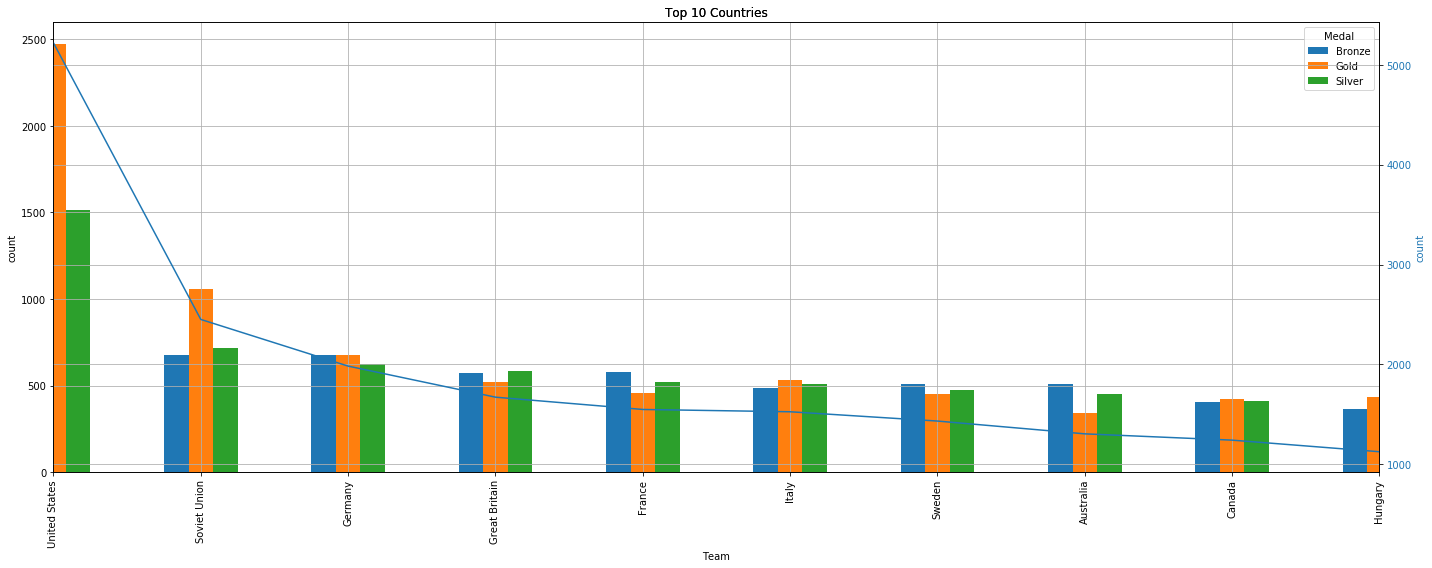

In [48]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Team')
ax1.set_ylabel('count')
medals_country.drop(['Total'], axis=1).head(10).plot.bar(title='Top 10 Countries', figsize=(20,8), grid=True, ax=ax1)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('count', color=color)
medals_country.head(10)['Total'].plot.line(title='Top 10 Countries', figsize=(20,8), grid=True, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [49]:
print("India's Position: ", end='')
medals_country = medals_country.reset_index()
medals_country[medals_country['Team'] == 'India'].index[0]

India's Position: 

34

**INDIA'S MEDAL BREAKUP**

In [50]:
india = data[(data['Medal'].notna()) & (data['Team'] == 'India')]

In [51]:
print(f'Indian\'s have won {len(india)} medals')

Indian's have won 197 medals


In [52]:
india

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
236445,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
236446,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
250689,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN


In [53]:
india_sports = pd.pivot_table(india, index='Sport', columns='Medal', aggfunc='count', values='ID').fillna(0)

In [54]:
india_sports

Medal,Bronze,Gold,Silver
Sport,,,
Alpinism,0.0,7.0,0.0
Athletics,0.0,0.0,2.0
Badminton,1.0,0.0,1.0
Boxing,2.0,0.0,0.0
Hockey,30.0,130.0,13.0
Shooting,1.0,1.0,2.0
Tennis,1.0,0.0,0.0
Weightlifting,1.0,0.0,0.0
Wrestling,4.0,0.0,1.0


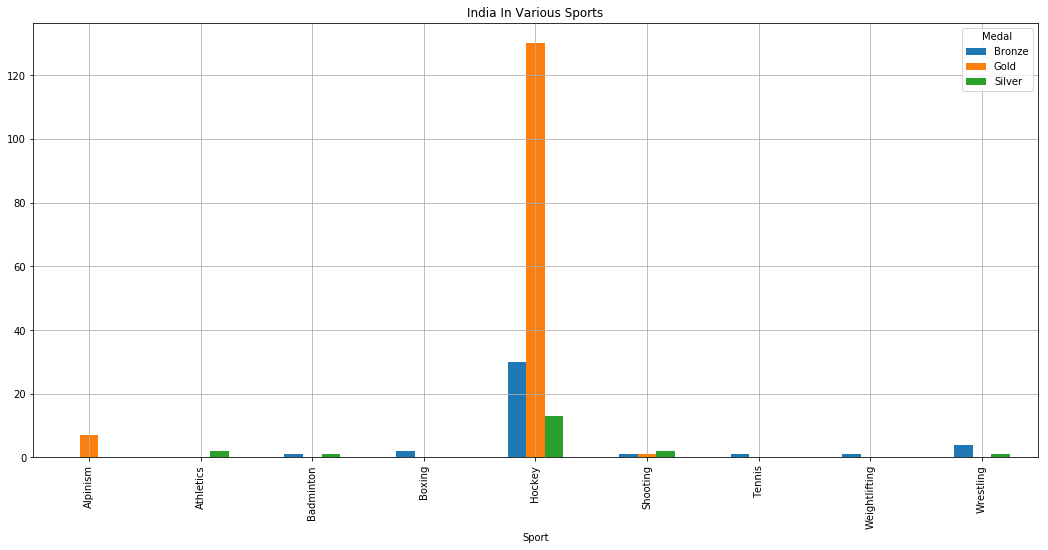

In [55]:
india_sports.plot.bar(figsize=(18,8), title="India In Various Sports", grid=True)

In [56]:
india_years = pd.pivot_table(india, index='Year', columns='Medal', aggfunc='count', values='ID').fillna(0)

In [57]:
india_years

Medal,Bronze,Gold,Silver
Year,,,
1900,0.0,0.0,2.0
1924,0.0,7.0,0.0
1928,0.0,14.0,0.0
1932,0.0,15.0,0.0
1936,0.0,19.0,0.0
1948,0.0,20.0,0.0
1952,1.0,14.0,0.0
1956,0.0,17.0,0.0
1960,0.0,0.0,13.0


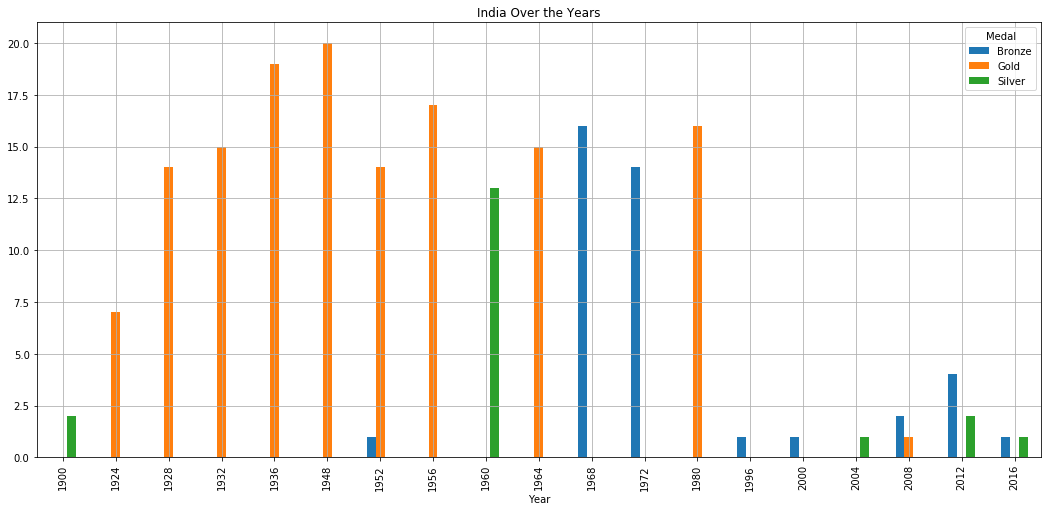

In [58]:
india_years.plot.bar(figsize=(18,8), title="India Over the Years", grid=True)

In [59]:
india_hockey = pd.pivot_table(india[india['Sport'] == 'Hockey'], index='Year',
                              columns='Medal', aggfunc='count', values='ID').fillna(0)

In [60]:
india_hockey

Medal,Bronze,Gold,Silver
Year,,,
1928,0.0,14.0,0.0
1932,0.0,15.0,0.0
1936,0.0,19.0,0.0
1948,0.0,20.0,0.0
1952,0.0,14.0,0.0
1956,0.0,17.0,0.0
1960,0.0,0.0,13.0
1964,0.0,15.0,0.0
1968,16.0,0.0,0.0


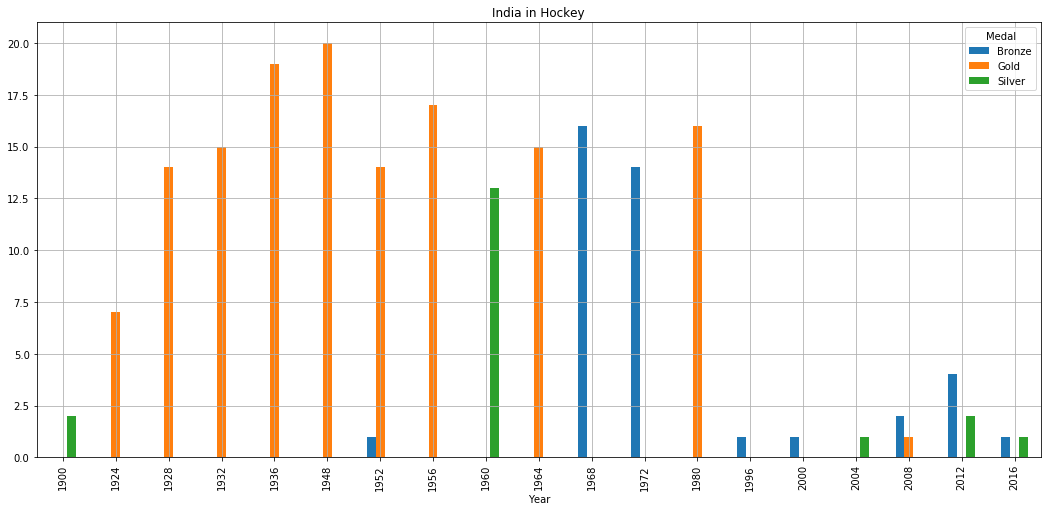

In [61]:
india_years.plot.bar(figsize=(18,8), title="India in Hockey", grid=True)

**WOMEN IN OLYMPICS**

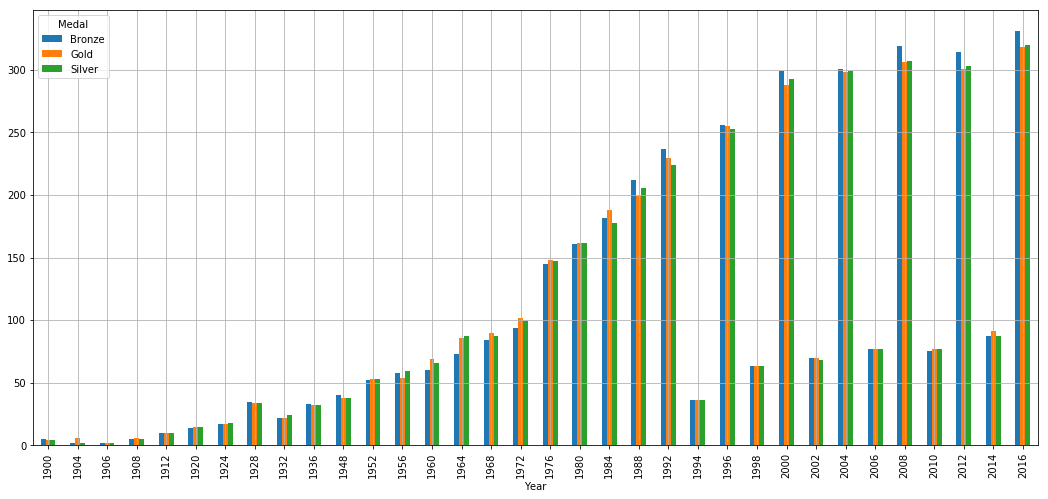

In [62]:
data[data['Sex'] == 'F'].pivot_table(index='Year', 
                                     columns='Medal', 
                                     values='Name', 
                                     aggfunc='count').plot.bar(figsize=(18,8), grid=True)

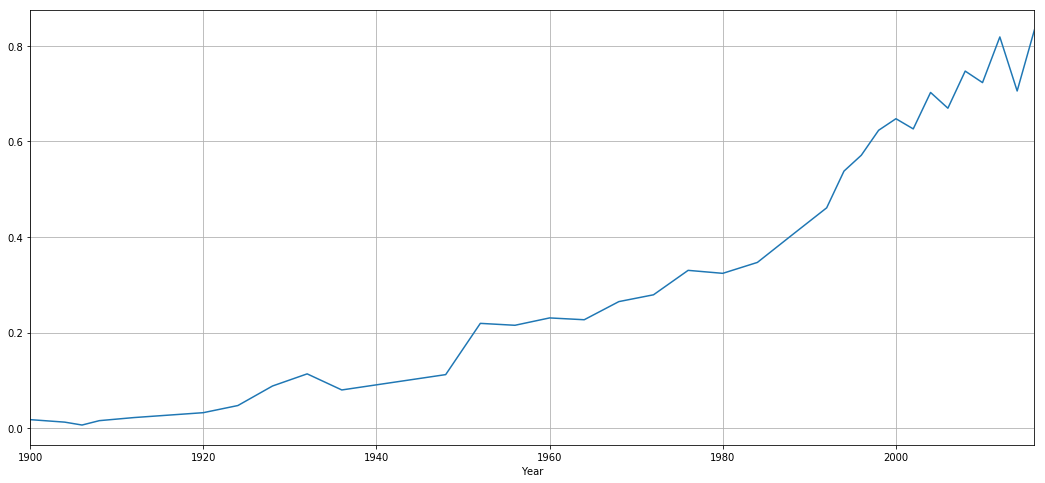

In [63]:
pd.DataFrame(data[data['Sex'] == 'F'].groupby('Year')['Year'].count()/data[data['Sex'] == 'M'].groupby('Year')['Year'].count()).dropna().plot.line(legend=False, figsize=(18,8), grid=True)